#**Reporte de Analisis VII**

**Explorando la libreria Matplotlib II**

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize = (15,10))

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
df = pd.read_csv("/content/gdrive/MyDrive/Archivos-csv/Alquiler_Residencias/Alq_Residencial_Sin_Outliers.csv", sep = ";")

In [7]:
df.head(15)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo de Casa
0,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,CASA
1,Casa,Lince,4,1,2,400,12000.0,0.0,0.0,30.00,CASA
2,Casa,Santa Anita,2,0,0,51,1500.0,50.0,0.0,29.41,CASA
3,Casa,San Luis,8,3,5,259,7000.0,0.0,0.0,27.03,CASA
4,Casa,Breña,1,0,0,33,1200.0,0.0,0.0,36.36,CASA
5,Casa,Lurín,3,2,1,135,3000.0,0.0,0.0,22.22,CASA
6,Casa,San Borja,2,0,0,40,950.0,0.0,50.0,23.75,CASA
7,Casa,San Miguel,4,1,1,191,4000.0,300.0,0.0,20.94,CASA
8,Casa,Mi Perú,5,4,2,450,7000.0,0.0,500.0,15.56,CASA
9,Casa,San Juan de Miraflores,2,1,0,59,1200.0,170.0,0.0,20.34,CASA


Creo una figura para graficos(se visualizara cuanda haya graficos que mostrar).

In [8]:
area = plt.figure()

<Figure size 1500x1000 with 0 Axes>

Quiero generar 4 graficos, dos arriba y dos abajo.

**add_subplot(n1,n2,n3):**

n1 = numero de filas

n2 = numero de columnas

n3 = posicion/orden del grafico

In [9]:
grafico_1 = area.add_subplot(2,2,1)
grafico_2 = area.add_subplot(2,2,2)
grafico_3 = area.add_subplot(2,2,3)
grafico_4 = area.add_subplot(2,2,4)

Creando una muestra de datos de la col. Valor y corrigiendo los indices para usarla como parametro en el grafico 3.

In [10]:
datos_g3 = df.Valor.sample(100) #obteniendo muestra aleatoria de la col. valor
datos_g3.index = range(datos_g3.shape[0]) #Arreglando los indices para que sean secuenciales
datos_g3

0      2800.0
1     10000.0
2      1400.0
3      1800.0
4     30000.0
       ...   
95     1500.0
96     5200.0
97     3000.0
98     3600.0
99     2100.0
Name: Valor, Length: 100, dtype: float64

In [11]:
#Configurando la variable area (creando los graficos)
#-----GRAFICO 1-----
grafico_1.scatter(df.Valor, df.Area)  #grafico de dispersion
grafico_1.set_title("Valor X Area")

#-----GRAFICO 2-----
grafico_2.hist(df.Valor)  #Grafico tipo Histograma
grafico_2.set_title("Histograma")

#-----GRAFICO 3-----
grafico_3.plot(datos_g3)   #Grafico de lineas
grafico_3.set_title("Muestra - Datos - columna Valor")

#-----GRAFICO 4-----
grupo = df.groupby("Tipo")["Valor"] #Agrupo el valor de los inmuebles por su tipo
etiqueta = grupo.mean().index
valores = grupo.mean().values
grafico_4.bar(etiqueta, valores)  #Grafico de barras
grafico_4.set_title("Valor Medio por Tipo de Inmueble")

Text(0.5, 1.0, 'Valor Medio por Tipo de Inmueble')

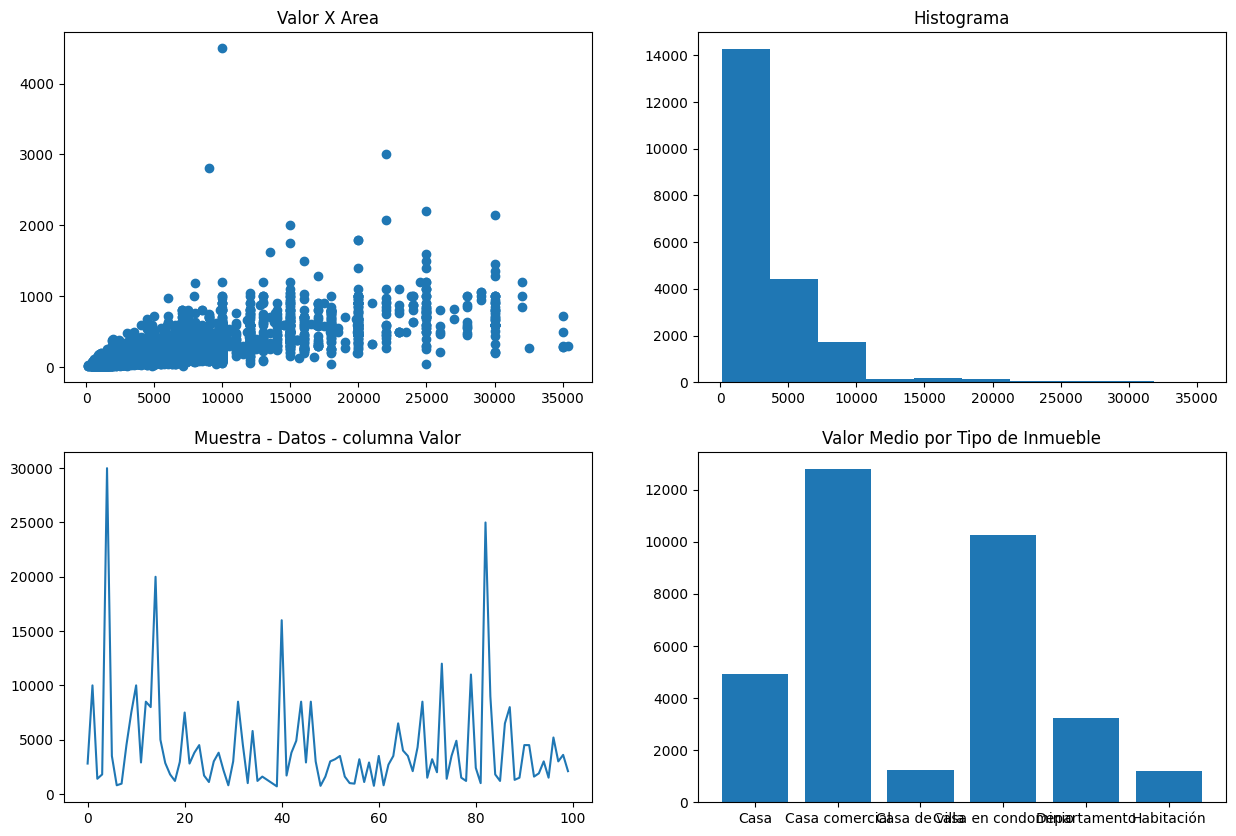

In [12]:
area

dpi = definicion de los pixeles.

In [13]:
area.savefig("Graficos_Residencias.png", dpi = 300) #exportando la figura al colab